<a href="https://colab.research.google.com/github/cermegno/my-computer-vision/blob/main/count-in-region/car_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Count cars in a region
Notebook to count cars in a region of an image

###Install Yolo
Start by installing the Python library Ultralytics. Its dependencies are also pulling other libraries we need,ex: OpenCV and MatPlotLib

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.7 MB/s eta 0:00:00


Import it

In [ ]:
import cv2 as cv
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

### Grab YOLO model
Grab it and show the details of the model

In [ ]:
model = YOLO("yolo11l.pt")
model.info()

YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(357, 25372160, 0, 87.6134912)

### Read the image to analyze

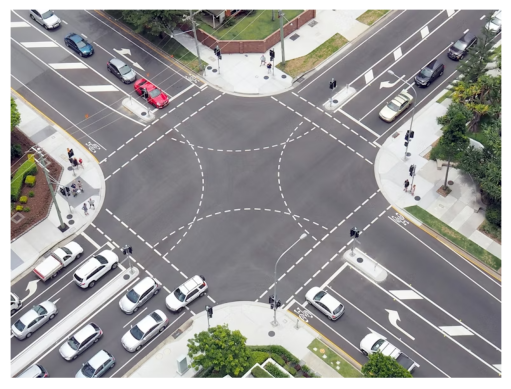

In [18]:
image = cv.imread("crossing.png")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Define the region of interest

In [19]:
region = [(0, 361), (330, 361), (330, 584), (0, 584)]
region_poly = np.array(region, dtype=np.int32)

###Run detection

In [ ]:
results = model.track(image, persist=True, show=False)

###Count the cars in the region

In [22]:
cars_in_zone = 0

for box, cls in zip(results[0].boxes.xyxy, results[0].boxes.cls):
    if int(cls) == 2:  # 2 is label for 'car' in the COCO dataset
        # Get the coordinates of the center of the car's bounding box
        x_center = (box[0] + box[2]) / 2
        y_center = (box[1] + box[3]) / 2

        # Check if this point is inside your polygon
        # Returns 1.0 (inside), 0.0 (edge), or -1.0 (outside)
        is_inside = cv.pointPolygonTest(region_poly, (float(x_center), float(y_center)), False)

        if is_inside >= 0:
            cars_in_zone += 1

print(f"Total cars currently in zone: {cars_in_zone}")

Total cars currently in zone: 10


###Visualize

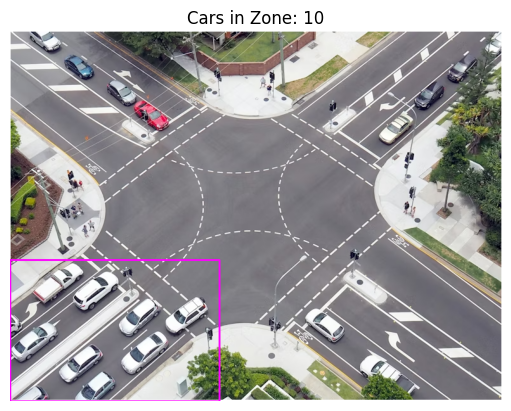

In [23]:
cv.polylines(image, [region_poly], isClosed=True, color=(255, 0, 255), thickness=2)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)) #OpenCV uses BGR
plt.title(f"Cars in Zone: {cars_in_zone}")
plt.axis('off')
plt.show()